To use this file, make sure to update the h5 filenames and set the index value and frames to be used for analysis 

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from collections import namedtuple, OrderedDict
Color = namedtuple('RGB','red, green, blue')
colors = {} #dict of colors
class RGB(Color): 
  def hex_format(self):
    'Returns color in hex format'
    return '#{:02X}{:02X}{:02X}'.format(self.red,self.green,self.blue)

In [ ]:
skyblue2 = RGB(126,192,238)
tan1 = RGB(255, 165, 79)
gray77 = RGB(196,196,196)

Set the filenames below

In [ ]:
control_filename = "Rat6-01302021154238-0000_updated_corrected.mp4.predictions.analysis.h5"
lesion_filename = "Rat6-03042021152754-0000_fixed.mp4.predictions.analysis.h5"
ldopa_filename = "Rat6-04022021145208-0000_fixed.mp4.predictions.analysis.h5"

In [ ]:
with h5py.File(control_filename, "r") as f:
    control_dset_names = list(f.keys())
    control_locations = f["tracks"][:].T
    control_node_names = [n.decode() for n in f["node_names"][:]]

with h5py.File(lesion_filename, "r") as f:
    lesion_dset_names = list(f.keys())
    lesion_locations = f["tracks"][:].T
    lesion_node_names = [n.decode() for n in f["node_names"][:]]

with h5py.File(ldopa_filename, "r") as f:
    ldopa_dset_names = list(f.keys())
    ldopa_locations = f["tracks"][:].T
    ldopa_node_names = [n.decode() for n in f["node_names"][:]]


Set the indeces and start + end frames to be used from each file. Verify index numbers.

In [ ]:
BPAW_INDEX = 5
BLIMB_INDEX = 6
bpaw_loc = control_locations[:, BPAW_INDEX, :, :]
blimb_loc = control_locations[:, BLIMB_INDEX, :, :]
CNTRL_RAT_INDEX = 9
CNTRL_START_FRAME = 600
CNTRL_STOP_FRAME = 1400

LESION_RAT_INDEX = 3
LESION_START_FRAME = 1400
LESION_STOP_FRAME = 2200

LDOPA_RAT_INDEX = 29
LDOPA_START_FRAME = 700
LDOPA_STOP_FRAME = 1500

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
sns.set('notebook', 'ticks', font_scale=1.2)
mpl.rcParams['figure.figsize'] = [15,6]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


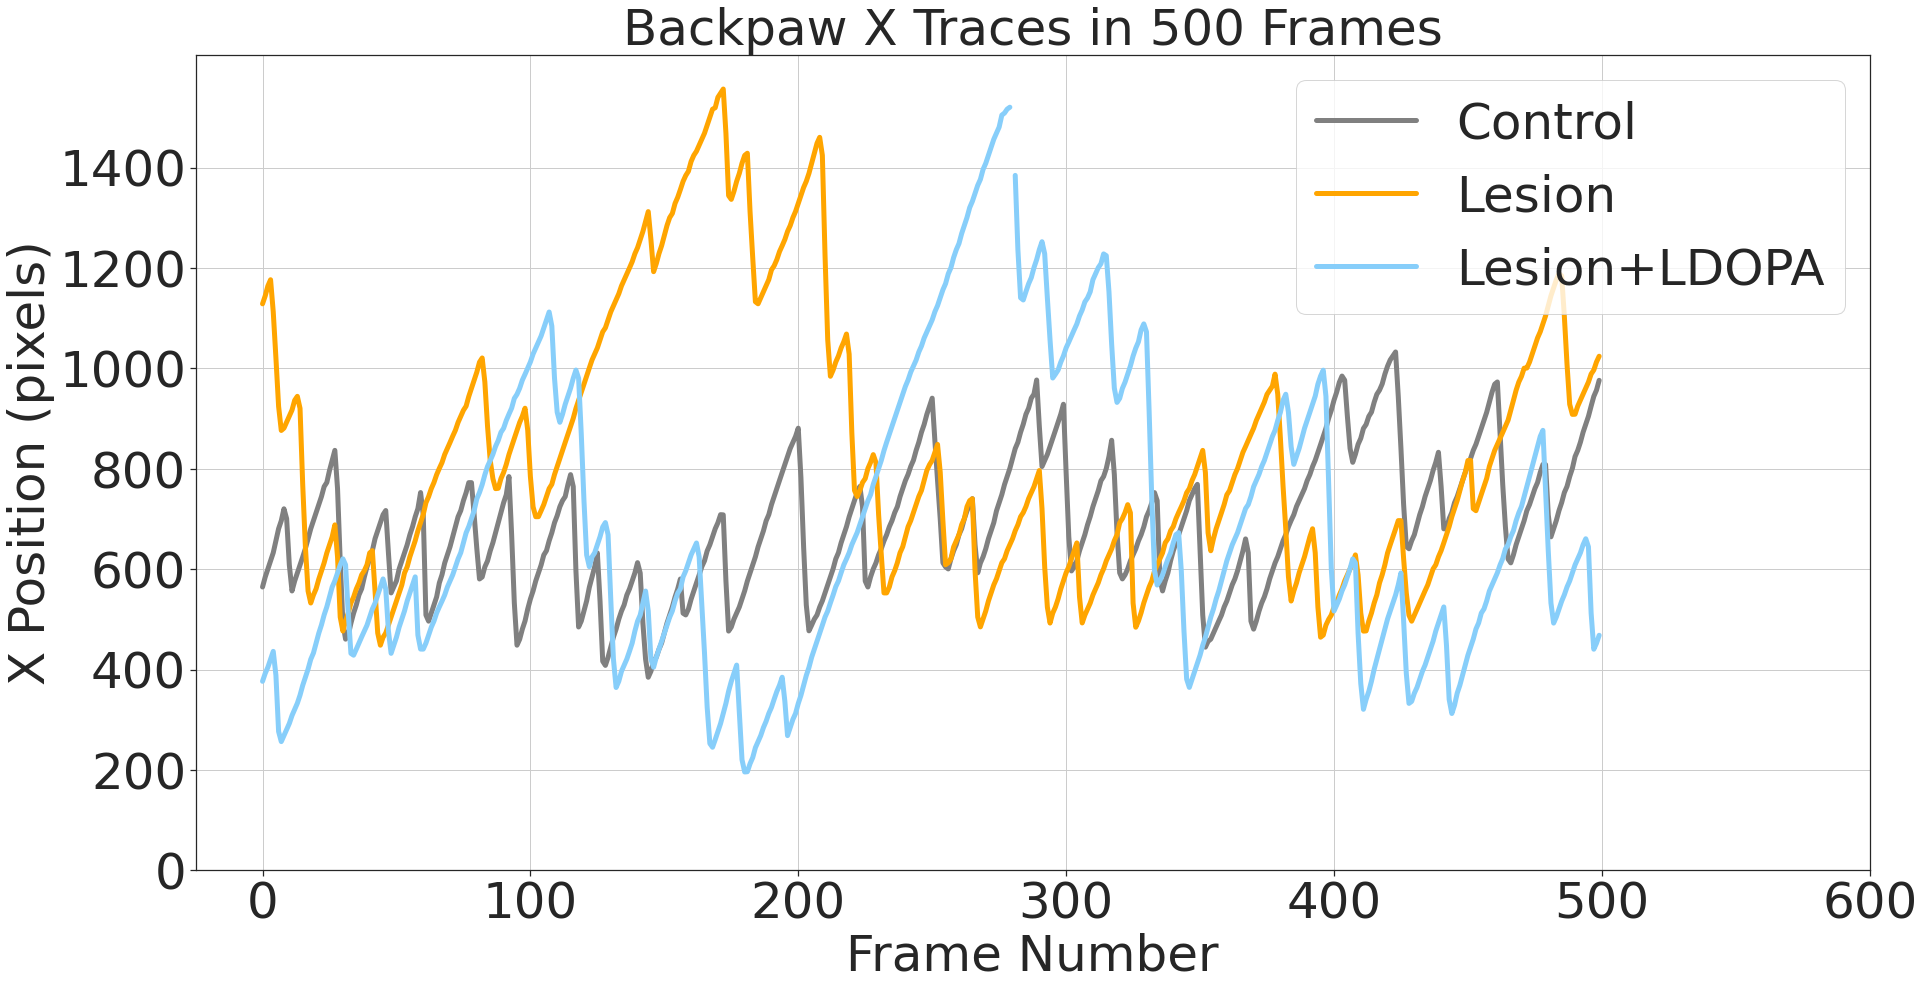

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(control_locations[CNTRL_START_FRAME:(CNTRL_START_FRAME + 500), BPAW_INDEX, 0, CNTRL_RAT_INDEX], 'gray',label='Control', linewidth = 5.0)
plt.plot(lesion_locations[LESION_START_FRAME:(LESION_START_FRAME + 500), BPAW_INDEX, 0, LESION_RAT_INDEX], 'orange',label='Lesion', linewidth = 5.0)
plt.plot(ldopa_locations[LDOPA_START_FRAME:(LDOPA_START_FRAME + 500), BPAW_INDEX, 0, LDOPA_RAT_INDEX], 'lightskyblue',label='Lesion+LDOPA', linewidth = 5.0)

#plt.plot(-1 * (control_locations[CNTRL_START_FRAME:CNTRL_STOP_FRAME, BPAW_INDEX, 1, CNTRL_RAT_INDEX]), 'b', label='Control Y Trace', linewidth = 5.0)
#plt.plot(-1 * (lesion_locations[LESION_START_FRAME:LESION_STOP_FRAME, BPAW_INDEX, 1, LESION_RAT_INDEX] - 200), 'r',label='LESION Y Trace', linewidth = 5.0)
#plt.plot(-1 * (ldopa_locations[LDOPA_START_FRAME:LDOPA_STOP_FRAME, BPAW_INDEX, 1, LDOPA_RAT_INDEX] - 400), 'g',label='LDOPA Y Trace', linewidth = 5.0)

plt.title('Backpaw X Traces in 500 Frames', fontsize=50)

#plt.plot(-1*thorax_loc[600:700,1,9], 'y')
#plt.plot(-1*thorax_loc[600:700,1,10], 'g')

plt.legend(loc="top right", fontsize=50)

x_ticks = np.arange(0, 700, 100)
plt.xticks(x_ticks)
plt.xlabel('Frame Number', fontsize=50)

y_ticks = np.arange(0, 1600, 200)
plt.yticks(y_ticks)
plt.ylabel('X Position (pixels)', fontsize=50)


#plt.rc('axes', titlesize=50)     # fontsize of the axes title
#plt.rc('axes', labelsize=50)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=50)    # fontsize of the tick labels
plt.rc('ytick', labelsize=50)  # fontsize of the tick labels


#y_ticks = np.arange(-800, 800, 50)
#plt.yticks(y_ticks)
plt.grid()

plt.savefig('xtrace.png')


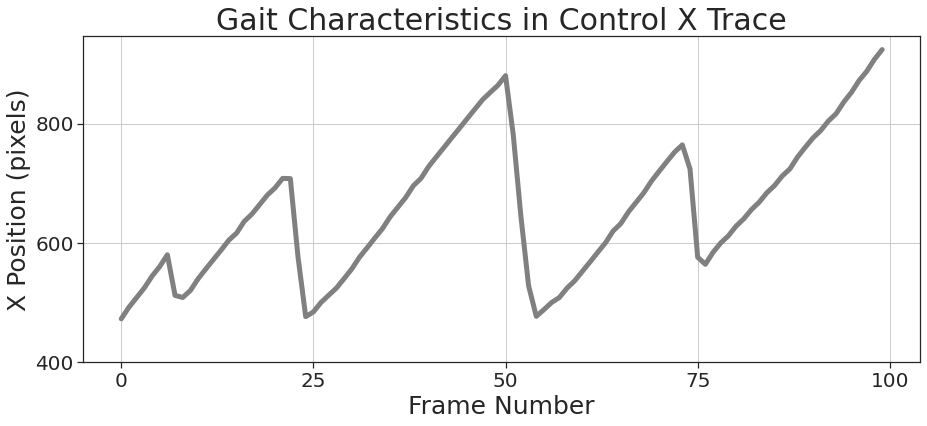

In [ ]:
plt.title('Gait Characteristics in Control X Trace', fontsize=30)
plt.plot(control_locations[CNTRL_START_FRAME + 150:(CNTRL_START_FRAME + 250), BPAW_INDEX, 0, CNTRL_RAT_INDEX], 'gray',label='Control', linewidth = 5.0)
x_ticks = np.arange(0, 125, 25)
plt.xticks(x_ticks)
plt.xlabel('Frame Number', fontsize=25)

y_ticks = np.arange(400, 1000, 200)
plt.yticks(y_ticks)
plt.ylabel('X Position (pixels)', fontsize=25)

plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)  # fontsize of the tick labels

plt.grid()
plt.savefig('gait.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Text(0.5, 1.0, 'Backpaw Tracks in 800 Frames')

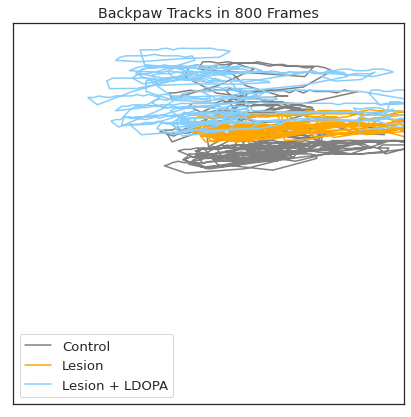

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(control_locations[CNTRL_START_FRAME:CNTRL_STOP_FRAME, BPAW_INDEX, 0, CNTRL_RAT_INDEX],control_locations[CNTRL_START_FRAME:CNTRL_STOP_FRAME, BPAW_INDEX, 1, CNTRL_RAT_INDEX], 'gray',label='Control')
plt.plot(lesion_locations[LESION_START_FRAME:LESION_STOP_FRAME, BPAW_INDEX, 0, LESION_RAT_INDEX],lesion_locations[LESION_START_FRAME:LESION_STOP_FRAME, BPAW_INDEX, 1, LESION_RAT_INDEX], 'orange',label='Lesion')
plt.plot(ldopa_locations[LDOPA_START_FRAME:LDOPA_STOP_FRAME, BPAW_INDEX, 0, LDOPA_RAT_INDEX],ldopa_locations[LDOPA_START_FRAME:LDOPA_STOP_FRAME, BPAW_INDEX, 1, LDOPA_RAT_INDEX], 'lightskyblue',label='Lesion + LDOPA')

plt.legend()

plt.xlim(0,1024)
plt.xticks([])

plt.ylim(0,1024)
plt.yticks([])
plt.title('Backpaw Tracks in 800 Frames')

In [ ]:
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [ ]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(thorax_loc[START_FRAME:STOP_FRAME,0,RAT_INDEX])

plt.figure(figsize=(50,15))
plt.plot(thorax_loc[START_FRAME:STOP_FRAME,0,RAT_INDEX], 'y',label='backpaw-0')
print(peaks)
# this way the x-axis corresponds to the index of x
#plt.plot(peaks, thorax_loc[peaks, 0, 9], "x")
#plt.show()

In [ ]:
# for local maxima
max = argrelextrema(thorax_loc[START_FRAME:STOP_FRAME,0,RAT_INDEX], np.greater)
print(max)
# for local minima
min = argrelextrema(thorax_loc[START_FRAME:STOP_FRAME,0,RAT_INDEX], np.less)
print(min)

print(len(min[0]))
print(type(max))

In [ ]:
min_len = len(min[0])
max_len = len(max[0])
if (min_len > max_len): 
  num_max = max_len
else: 
  num_max = min_len
step_length = np.ones(num_max)
frames = np.ones(num_max)
#rows, cols = (num_max, 2)
#step_length = [[0]*cols]*rows
for i in range(0,num_max): 
  print(i)
  #step_length[i][0] = ((max[0][i] + min[0][i]) / 2) + START_FRAME
  frames[i] = ((max[0][i] + min[0][i]) / 2) + START_FRAME
  step_length[i] = abs(thorax_loc[START_FRAME + max[0][i],0,RAT_INDEX]) - abs(thorax_loc[START_FRAME + min[0][i],0,RAT_INDEX])
  #step_length[i][1] = abs(thorax_loc[600 + max[0][i],0,9]) - abs(thorax_loc[600 + min[0][i],0,9])
print(step_length)

In [ ]:
plt.figure(figsize=(50,15))
plt.plot(frames, step_length, '-o')
avg_step_length = np.mean(step_length)
print(avg_step_length)



In [ ]:
speed = sum(step_length) / (1400-600+1)
print(speed)

In [ ]:
stance_times = np.ones(num_max)
step_times = np.ones(num_max)

for i in range(0,num_max): 
  step_times[i] = abs(min[0][i] - max[0][i]) 

  if (i+1 < num_max) :
    stance_times[i] = abs(max[0][i+1] - min[0][i]) 

print(stance_times)
print(step_times)
total_stance = sum(stance_times)
total_step = sum(step_times)
print(total_stance)
print(total_step)
print(total_step + total_stance)

In [ ]:
step_percent = total_step / (total_step + total_stance)
print(step_percent)

In [ ]:
frequency_of_steps = step_times.size / (STOP_FRAME - START_FRAME + 1) 
print(frequency_of_steps)